# Cetene Daily Closing Price
## Takahiro Wada

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
from sklearn.linear_model import LinearRegression
import seaborn as sn
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

## Introduction

Our goal is to identify the most effective multiple variable model for predicting the daily closing price of Centene (CNC). To achieve this objective, we will leverage the predictive power of four key stocks - Anthem (ANTM), Cigna (CI), United Health Group (UNH), and Humana (HUM) - and examine their relationship with CNC.

Once we have established the most effective predictive model, we will be able to use it to inform our investment decisions and optimize our portfolio. By leveraging data-driven insights, we can make informed investment choices that lead to greater returns and success in the marketplace.

Overall, our analysis will provide valuable insights into the relationship between these stocks and CNC, and help us make more informed decisions when it comes to investing in the healthcare sector.

## The Data

In [2]:
# Import the excel file
data = pd.read_excel(r'C:\Users\bwada\Documents\ClosingPrices.xlsx')

# Import necessary columns
df = pd.DataFrame(data, columns=['CNC', 'ANTM', 'HUM', 'UNH', 'CI'])
print(df)

           CNC        ANTM         HUM         UNH          CI
0    62.380001  278.250000  408.579987  312.100006  174.839996
1    64.639999  293.459991  423.429993  321.350006  183.880005
2    63.990002  327.859985  452.010010  354.559998  210.619995
3    67.879997  319.600006  440.790009  354.399994  214.160004
4    67.930000  313.320007  432.549988  347.459991  201.470001
..         ...         ...         ...         ...         ...
245  69.239998  433.339996  461.850006  449.160004  216.399994
246  67.970001  434.559998  463.420013  449.489990  215.619995
247  70.970001  436.239990  467.100006  454.640015  215.669998
248  70.550003  433.679993  458.640015  453.480011  213.399994
249  71.610001  433.359985  467.600006  455.440002  215.750000

[250 rows x 5 columns]


In [3]:
# Check for missing values/errors
df.isnull().sum().sum()

0

I loaded in the data into Python from the Excel file. The file contains 58 different healthcare stocks daily closing price, but I chose only the 5 stocks that are in the same GICS sub-industry category as Centene, Managed Healthcare. I checked to see any missing values or error in the data set, but there is none. This data set was collected by the NASDAQ historical quotes from November 2, 2020 to October 28, 2021.

## Analyzing the Variables

I made a scatter plot with each predictor variable to visually analyze the graph and identify any relationship with Centene's daily closing price. This will give us an idea of which predictor variable will be most significant towards our final model.

### Scatter Plots of CNC VS HUM

<AxesSubplot:xlabel='HUM', ylabel='CNC'>

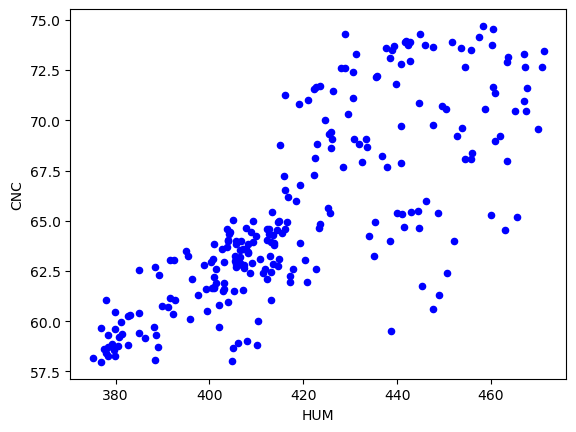

In [4]:
df.plot.scatter(x = 'HUM', y = 'CNC', c = 'blue')

We see a moderate linear relationship between Centene and Humana with moderate dispersion in the upper right region.

### Scatter Plots of CNC VS ANTM

<AxesSubplot:xlabel='ANTM', ylabel='CNC'>

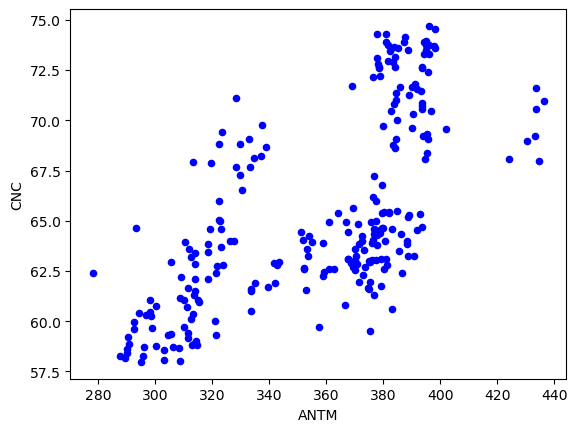

In [5]:
df.plot.scatter(x = 'ANTM', y = 'CNC', c = 'blue')

We see a moderate linear relationship between Centene and Anthem with moderate dispersion in the upper right region.

### Scatter Plots of CNC VS UNH

<AxesSubplot:xlabel='UNH', ylabel='CNC'>

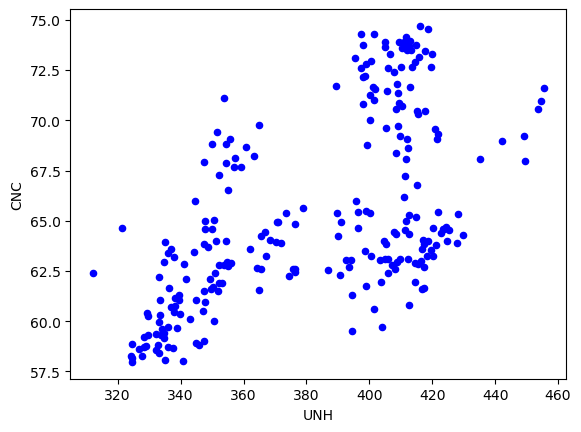

In [6]:
df.plot.scatter(x = 'UNH', y = 'CNC', c = 'blue')

We see a moderate linear relationship between Centene and United Health Group with moderate dispersion in the upper region.

### Scatter Plots of CNC VS CI

<AxesSubplot:xlabel='CI', ylabel='CNC'>

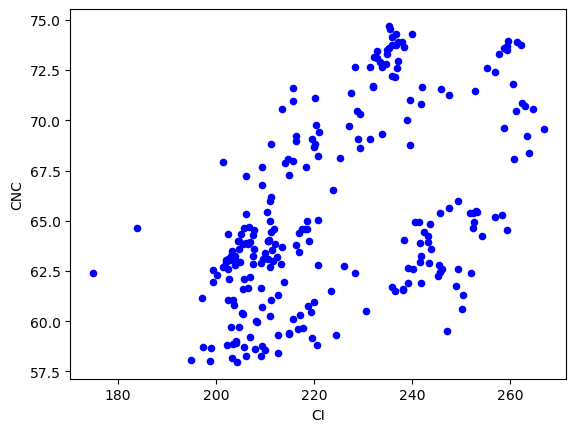

In [7]:
df.plot.scatter(x = 'CI', y = 'CNC', c = 'blue')

We see a moderate linear relationship between Centene and Cigna with moderate dispersion in the upper region.

## Verifying Error Assumptions

We must confirm that our data set is fit to be used in our model by analyzing the error.

In [8]:
# independent variable
x = df[['HUM', 'ANTM', 'UNH', 'CI']]
  
# output variable (dependent)
y = df['CNC']
  
# adding constant
x = sm.add_constant(x)
  
#fit linear regression model
model = sm.OLS(y, x).fit()
  
# sum of residuals
sum(model.resid)

-3.069544618483633e-12

As we can see, the sum of errors is very close to 0. This indicates that the model is a good fit for the data, and that the predicted values are similar to the actual values. However, simply adding up residuals is not enough to determine the overall goodness of fit of the model. We will next plot a normal Q-Q plot to visually see if the data is normally distributed.

### Normal Q-Q plot

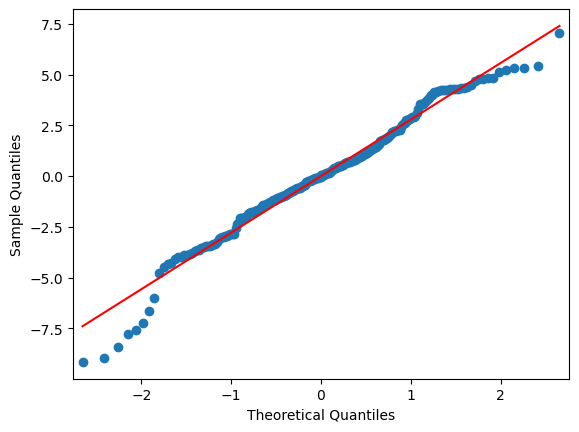

In [9]:
sm.qqplot(model.resid, line ='s')
py.show()

As we can see from the graph, the data is not perfectly linear with the Q-Q line. Based off the curvature on both ends of the graph, a quadratic terms may help the normality of the error terms.


### Correlation Matrix

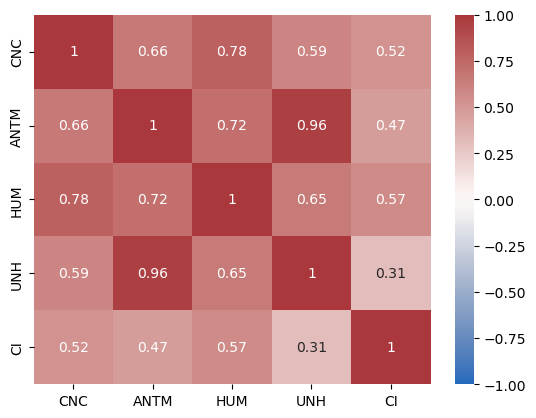

In [10]:
matrix = df.corr()
sn.heatmap(matrix, annot = True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

We want to determine numerically which predictor variables are linearly correlated with Centene. Scatter plots alone is not enough to determine which variables to use. Looking at the correlation matrix, each variable had a linear coefficient value greater than 0.50 making each predictor variable significant. We can see that Humana has the highest linear coefficient value. 

## Variable Selection Process

Based off the scatter plots and correlation matrix, each predictor variable seems significant enough to be included towards the model. However, to make sure we have selected the right variables to create our model, we will do a Stepwise regression. It involves a step-by-step process of adding or removing variables from a model based on their statistical significance and their contribution to the overall goodness of fit of the model.

We will be selecting our predictor variables with p-values that are less than 0.05.

### Stepwise Regression

In [11]:
def reg():
    x = df[['HUM', 'ANTM', 'UNH', 'CI']]
    x = sm.add_constant(x)
    results = sm.OLS(y, x).fit()
    print(results.summary())
reg()

                            OLS Regression Results                            
Dep. Variable:                    CNC   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     109.8
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.86e-53
Time:                        17:58:18   Log-Likelihood:                -610.94
No. Observations:                 250   AIC:                             1232.
Df Residuals:                     245   BIC:                             1249.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3037      3.799      1.659      0.0

As we can see, UnitedHealth Group (UNH) has a P-value greater than 0.05 so we will be removing UNH from our model. We will see the summary of our model without UNH.

In [12]:
def reg():
    x = df[['HUM', 'ANTM', 'CI']]
    x = sm.add_constant(x)
    results = sm.OLS(y, x).fit()
    print(results.summary())
reg()

                            OLS Regression Results                            
Dep. Variable:                    CNC   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     146.2
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           2.17e-54
Time:                        17:58:18   Log-Likelihood:                -611.37
No. Observations:                 250   AIC:                             1231.
Df Residuals:                     246   BIC:                             1245.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3322      3.148      1.376      0.1

As we can see, all our variables have a p-value less than 0.05 which is significant. We will use Anthem (ANTM), Cigna (CI), and Humana (HUM) in our model. Currently the model has an Adj. R-Squared of 0.636. Hopefully adding more complex terms will improve the overall mode.

## Interaction Terms

Since all the stocks are in the same sub-industry of healthcare, it is logical to think that each stock may be related to one another. We will add the interaction terms into the model and analyze each interaction variables p-values in hopes of improvement.

In [13]:
df2 = pd.DataFrame(data, columns=['ANTM', 'HUM', 'CI'])
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
df_interaction = interaction.fit_transform(df2)
df_interaction = pd.DataFrame(df_interaction, columns=interaction.get_feature_names(df2.columns))

def interactionReg():
    x = df_interaction[['HUM', 'ANTM', 'CI', 'ANTM HUM', 'ANTM CI', 'HUM CI']]
    x = sm.add_constant(x)
    results = sm.OLS(y, x).fit()
    print(results.summary())
interactionReg()

                            OLS Regression Results                            
Dep. Variable:                    CNC   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     86.28
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           2.15e-57
Time:                        17:58:18   Log-Likelihood:                -596.65
No. Observations:                 250   AIC:                             1207.
Df Residuals:                     243   BIC:                             1232.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -122.1482     44.279     -2.759      0.0

From the summary, we see that ANTM HUM has a p-value greater than 0.05 so we will reject it from our final model. Lets see if it improved our model.

In [14]:
def interactionReg():
    x = df_interaction[['HUM', 'ANTM', 'CI', 'ANTM CI', 'HUM CI']]
    x = sm.add_constant(x)
    results = sm.OLS(y, x).fit()
    print(results.summary())
interactionReg()

                            OLS Regression Results                            
Dep. Variable:                    CNC   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     102.6
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           5.71e-58
Time:                        17:58:19   Log-Likelihood:                -597.73
No. Observations:                 250   AIC:                             1207.
Df Residuals:                     244   BIC:                             1229.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -99.1297     41.440     -2.392      0.0

As we can see, the interaction term ANTM HUM is not significant and has been removed from the model. Removing the interaction term has made all the other interaction terms p-value more significant. We also see that adding the interaction terms have increased the Adjusted R-Squared value.

## Quadratic Terms

We will next add quadratic terms to the model and determine if they are significant to the model.

In [15]:
df3 = pd.DataFrame(df_interaction, columns=['ANTM', 'HUM', 'CI'])
quadratic = PolynomialFeatures(degree=2, include_bias=False)
df_quadratic = quadratic.fit_transform(df3)
df_quadratic = pd.DataFrame(df_quadratic, columns=quadratic.get_feature_names(df3.columns))

def quadraticReg():
    x = df_quadratic[['HUM', 'ANTM', 'CI', 'ANTM CI', 'HUM CI', 'ANTM^2', 'HUM^2', 'CI^2']]
    x = sm.add_constant(x)
    results = sm.OLS(y, x).fit()
    print(results.summary())
quadraticReg()

                            OLS Regression Results                            
Dep. Variable:                    CNC   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     93.01
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           2.78e-69
Time:                        17:58:19   Log-Likelihood:                -563.31
No. Observations:                 250   AIC:                             1145.
Df Residuals:                     241   BIC:                             1176.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -129.3291     50.723     -2.550      0.0

From the summary, we see that HUM^2 has a p-value greater than 0.05 so we will reject it from our final model. Lets see if it improved our model.

In [16]:
def quadraticReg():
    x = df_quadratic[['HUM', 'ANTM', 'CI', 'ANTM CI', 'HUM CI', 'ANTM^2', 'CI^2']]
    x = sm.add_constant(x)
    results = sm.OLS(y, x).fit()
    print(results.summary())
quadraticReg()

                            OLS Regression Results                            
Dep. Variable:                    CNC   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     106.6
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           2.86e-70
Time:                        17:58:19   Log-Likelihood:                -563.41
No. Observations:                 250   AIC:                             1143.
Df Residuals:                     242   BIC:                             1171.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -114.0780     37.206     -3.066      0.0

As we can see, the quadratic term HUM^2 is not significant and has been removed from the model. Removing the quadratic term has made all the other interaction terms p-value more significant. We also see that adding the quadratic terms have increased the Adjusted R-Squared value.

## Multicollinearity

Since we are using multiple predictor variables in this model, it is important to confirm none of the variables are correlated to one another.

In [26]:
model2 = sm.OLS(df['CNC'], sm.add_constant(df[['HUM', 'ANTM', 'CI']])).fit()
vif = pd.DataFrame()
vif["variables"] = sm.add_constant(df[['HUM', 'ANTM', 'CI']]).columns
vif["VIF"] = [variance_inflation_factor(sm.add_constant(df[['HUM', 'ANTM', 'CI']]).values, i)
              for i in range(sm.add_constant(df[['HUM', 'ANTM', 'CI']]).shape[1])]
print(vif)

  variables         VIF
0     const  312.845865
1       HUM    2.369435
2      ANTM    2.079838
3        CI    1.490767


Based on the Variance Inflation factor, we see each predictor variable is less than 10. There is no multicollinearity.

## Final Model

In [29]:
def FinalReg():
    x = df_quadratic[['HUM', 'ANTM', 'CI', 'ANTM CI', 'HUM CI', 'ANTM^2', 'CI^2']]
    x = sm.add_constant(x)
    results = sm.OLS(y, x).fit()
    print(results.summary())
FinalReg()

                            OLS Regression Results                            
Dep. Variable:                    CNC   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     106.6
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           2.86e-70
Time:                        18:07:39   Log-Likelihood:                -563.41
No. Observations:                 250   AIC:                             1143.
Df Residuals:                     242   BIC:                             1171.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -114.0780     37.206     -3.066      0.0

Our final model is :

Y = -114.07 + 0.5642(X_3, HUM) - 0.8162(X_1, ANTM) + 1.5857(X_2,CI) + 0.0056(X_6,ANTM CI) - 0.0022(X_7, HUM CI) - 0.0005(X_4, ANTM^2) - 0.0059(X_5,CI^2) 

The final model has an R-Square Adjusted = 0.748 which means that 74.8% of the variation in
Centene’s daily closing price are explained by the predictor variables. The R-Squared Adjusted is greater than the acceptable value for R-Squared Adjusted of 50%. The F-Statistic = 106.6 and P-Value = <0.0001. I also noticed when we removed the non-significant interaction and quadratic term, our overall model and the independent variables t-test statistics have improved, so it is safe to say we have found our best prediction model.

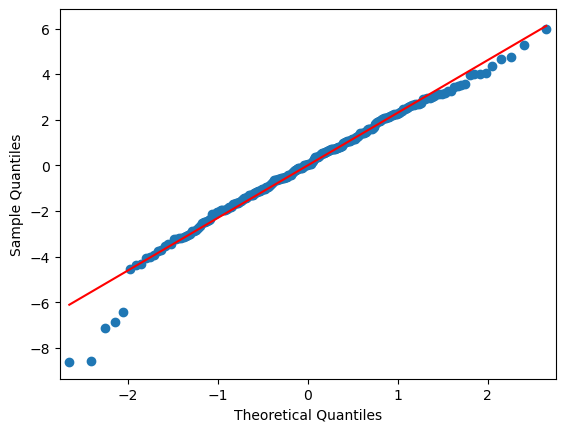

In [31]:
x = df_quadratic[['HUM', 'ANTM', 'CI', 'ANTM CI', 'HUM CI', 'ANTM^2', 'CI^2']]
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
sm.qqplot(results.resid, line ='s')
py.show()

As we can see, the Normal Q-Q plot shows the residuals are normally distibuted with majority of data points on the line with a few outliers on both ends of the line.

## Conclusion

I can confidently conclude that we have developed the best model for predicting Cenetene's daily closing price using predictor variables: HUM, ANTM, CI, ANTM CI, HUM CI, ANTM^2, CI^2. 

## Dataset Citation

“Market Activity Market Activity -&gt; Stocks Options Etfs Mutual Funds Indexes Commodities Cryptocurrency Currencies Futures Fixed Income Global Markets Quick Links Real-Time Quotes after-Hours Quotes Pre-Market Quotes NASDAQ-100 Symbol Screener Online Brokers Glossary Sustainable Bond Network Symbol Change History IPO Performance Ownership Search Dividend History Investing Lists Rulebooks &amp; Regulations Fundinsight Market Events Economic Calendar Earnings IPO Calendar Dividend Calendar Spo Calendar Holiday Schedule Analyst Activity Analyst Recommendations Daily Earnings Surprise Forecast Changes Commodities -&gt; Gold Copper Crude Oil Natural Gas Nasdaq Data Statistical Milestones Total Returns Daily Market Statistics Most Active See All Market Activity -&gt;.” Nasdaq, www.nasdaq.com/market-activity/stocks/cnc/historical.  